In [3]:
import numpy as np
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd


<Axes: >

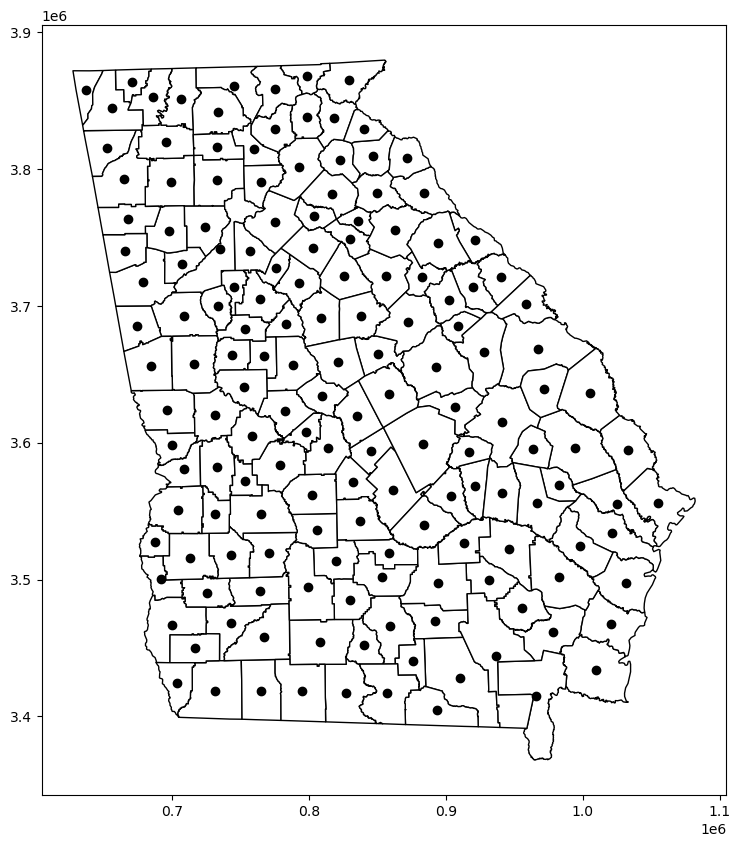

In [4]:
georgia_data = pd.read_csv(ps.examples.get_path('GData_utm.csv'))
georgia_shp = gp.read_file(ps.examples.get_path('G_utm.shp'))
fig, ax = plt.subplots(figsize=(10,10))
georgia_shp.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
georgia_shp.centroid.plot(ax=ax, c='black')

In [5]:
g_y = georgia_data['PctBach'].values.reshape((-1,1))
g_X = georgia_data[['PctFB', 'PctBlack', 'PctRural']].values
u = georgia_data['X']
v = georgia_data['Y']
g_coords = list(zip(u,v))

g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [6]:
g_coords

[(941396.6, 3521764.0),
 (895553.0, 3471916.0),
 (930946.4, 3502787.0),
 (745398.6, 3474765.0),
 (849431.3, 3665553.0),
 (819317.3, 3807616.0),
 (803747.1, 3769623.0),
 (699011.5, 3793408.0),
 (863020.8, 3520432.0),
 (859915.8, 3466377.0),
 (809736.9, 3636468.0),
 (844270.1, 3595691.0),
 (979288.9, 3463849.0),
 (827822.0, 3421638.0),
 (1023145.0, 3554982.0),
 (994903.4, 3600493.0),
 (971593.8, 3671394.0),
 (782448.2, 3684504.0),
 (724741.2, 3492653.0),
 (1008480.0, 3437933.0),
 (964264.9, 3598842.0),
 (678778.6, 3713250.0),
 (670055.9, 3862318.0),
 (962612.3, 3432769.0),
 (1059706.0, 3556747.0),
 (704959.2, 3577608.0),
 (653026.6, 3813760.0),
 (734240.9, 3794110.0),
 (832508.6, 3762905.0),
 (695793.9, 3495219.0),
 (745538.8, 3711726.0),
 (908046.1, 3428340.0),
 (724646.8, 3757187.0),
 (894463.9, 3492465.0),
 (808691.8, 3455994.0),
 (942527.9, 3722100.0),
 (839816.1, 3449007.0),
 (705457.9, 3694344.0),
 (783416.5, 3623343.0),
 (805648.4, 3537103.0),
 (635964.3, 3854592.0),
 (764386.1, 3

In [7]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

117.0
